
The OLS model helps deal with the outlier in the model. The major outlier was NYC causing significant skewness in the model. 

Entire dataset including NYC: R-squared 0.9987417422426107
Removing the NYC outlier: R-squared 0.9392831408224471

The difference betweeen the R-squared is only 0.05945860142. It is not a significant difference, indicates that OLS model a great job using the entire dataset to model the data. 

In [23]:
import math

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline
sns.set_style('white')

In [24]:
df = pd.read_csv('/Users/mille/Desktop/Simple Linear Regression/NYC_crime.csv')


In [25]:
df.head()

,City,Population,Pop2,Violent_crime,Murder_nonneg_nonman,Rape1,Rape2,Robbery,Agg_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft,Arson3
0,Adams Village,1861.0,3.463321e+06,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,6.640929e+06,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,8.099716e+06,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,9.595378e+09,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,4.080654e+07,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [26]:
df['Population'] = df[['Population']].convert_objects(convert_numeric=True)
df['Violent_crime'] = df[['Violent_crime']].convert_objects(convert_numeric=True)
df['Robbery'] = df[['Robbery']].convert_objects(convert_numeric=True)
df['Property_crime'] = df[['Property_crime']].convert_objects(convert_numeric=True)
df['Pop2'] = df[['Pop2']].convert_objects(convert_numeric=True)
df['Murder_nonneg_nonman'] = df[['Murder_nonneg_nonman']].convert_objects(convert_numeric=True)

df.head()

C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel packag

,City,Population,Pop2,Violent_crime,Murder_nonneg_nonman,Rape1,Rape2,Robbery,Agg_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft,Arson3
0,Adams Village,1861.0,3.463321e+06,0.0,0.0,NaN,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
1,Addison Town and Village,2577.0,6.640929e+06,3.0,0.0,NaN,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
2,Akron Village,2846.0,8.099716e+06,3.0,0.0,NaN,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
3,Albany,97956.0,9.595378e+09,791.0,8.0,NaN,30.0,227.0,526.0,4090.0,705.0,3243.0,142.0,NaN
4,Albion Village,6388.0,4.080654e+07,23.0,0.0,NaN,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [27]:
df['Pop_sq'] = df['Population']**2

         City  Population          Pop2  Violent_crime  Murder_nonneg_nonman  \
216  New York   8396126.0  7.049493e+13        52384.0                 335.0   

     Rape1   Rape2  Robbery  Agg_assault  Property_crime  Burglary  \
216    NaN  1112.0  19170.0      31767.0        141971.0   16606.0   

     Larceny_theft  Motor_vehicle_theft  Arson3        Pop_sq  
216       117931.0               7434.0     NaN  7.049493e+13  


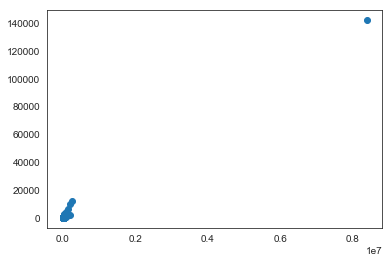

In [28]:
print(df.loc[df['Population']==max(df['Population']),:])

plt.scatter(df['Population'],df['Property_crime'])
plt.show()

In [41]:
nonyc=df.loc[df['City']!="New York",:]

**$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$**

**Removed outlier**

In [42]:
linear_formula = 'Property_crime ~ Population + Pop_sq + Murder_nonneg_nonman + Robbery'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=nonyc).fit()

**Let's look at the coefficients of our model.**

In [43]:
lm.params

Intercept              -2.503986e+01
Population              2.055198e-02
Pop_sq                 -7.194683e-08
Murder_nonneg_nonman    1.026434e+02
Robbery                 5.130014e+00
dtype: float64

**p-values**

In [44]:
lm.pvalues

Intercept               1.855630e-01
Population              7.640551e-53
Pop_sq                  1.275907e-11
Murder_nonneg_nonman    4.137181e-12
Robbery                 7.714970e-11
dtype: float64

**R-Squared**

Entire dataset including NYC: R-squared 0.9987417422426107
Removing the NYC: R-squared 0.9392831408224471


In [45]:
lm.rsquared

0.9392831408224471

**Confidence Intervals**

Entire dataset including NYC

                              0	             1
Intercept	           -1.251639e+01	6.080357e+01
Population	            1.404110e-02	1.780572e-02
Pop_sq	               -1.208108e-09	-8.128071e-10
Murder_nonneg_nonman	8.796575e+01	1.471533e+02
Robbery	                7.825352e-01	3.401186e+00

In [46]:
lm.conf_int()

,0,1
Intercept,-6.216910e+01,1.208938e+01
Population,1.834907e-02,2.275489e-02
Pop_sq,-9.213376e-08,-5.175990e-08
Murder_nonneg_nonman,7.455917e+01,1.307276e+02
Robbery,3.627986e+00,6.632041e+00


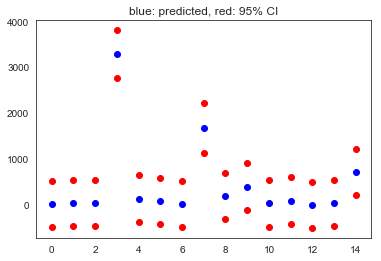

In [47]:
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()